In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
df=pd.read_excel(r'F:\Study\corizo\Project\Minor Project\SPP.xlsx')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [7]:
df['Date'].values

array(['2018-02-05T00:00:00.000000000', '2018-02-06T00:00:00.000000000',
       '2018-02-07T00:00:00.000000000', ...,
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
type(df['Date'].values)

numpy.ndarray

In [11]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
print(f'Datafram contains stock price betweenm {df.Date.max()} {df.Date.min()}')
print(f'Total Days {df.Date.max()-df.Date.min()} Days')

Datafram contains stock price betweenm 2022-02-04 00:00:00 2018-02-05 00:00:00
Total Days 1460 days 00:00:00 Days


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<Axes: >

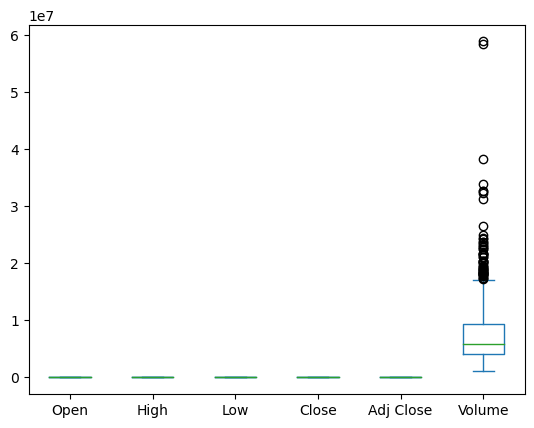

In [14]:
df[['Open','High','Low','Close','Adj Close','Volume']].plot(kind='box')

In [15]:
#Plotting the Layout
layout=go.Layout(
            title='Stock Price Prediction',
            xaxis=dict(
                title='Date',
                titlefont=dict(
                    size=18,
                    color='#7f7f7f',
                    family='Courier New,monospace'
                    
                )
            ),
            yaxis=dict(
                title='Price',
                titlefont=dict(
                    size=18,
                    color='#7f7f7f',
                    family='Courier New,monospace'
                    
                )
            )
        
        )
df_data=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=df_data,layout=layout)

In [16]:
#plotting offline
iplot(plot)

In [17]:
#Building the regression Model
from sklearn.model_selection import train_test_split as tts

#For Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#For Evaluating
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [20]:
#Split the data into train and test sets
X=np.array(df.index).reshape(-1,1)
Y=df['Close']

X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,random_state=101)

print(X_train.shape,'\n')
print(X_test.shape,'\n')
print(Y_train.shape,'\n')
print(Y_test.shape,'\n')

(706, 1) 

(303, 1) 

(706,) 

(303,) 



In [21]:
Y_train

290    367.720001
167    377.049988
949    646.909973
835    499.079987
885    512.400024
          ...    
575    451.040009
838    494.739990
337    352.010010
523    372.779999
863    537.309998
Name: Close, Length: 706, dtype: float64

In [22]:
#Featue Scaling
scaler=StandardScaler().fit(X_train)

In [23]:
scaler

StandardScaler()

In [24]:
#creating a linear Model

from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [25]:
#Plot the actual and Predicted values for train datasets

trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
    
)

trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted',
    )

df_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=df_data,layout=layout)

In [26]:
iplot(plot2)

In [27]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944175	0.7261648669848495



In [43]:
Y_pred = lm.predict(X_test)

In [44]:
def metrics(Y_true, Y_pred):
    print(f'RMSE:', mean_squared_error(Y_true, Y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(Y_true, Y_pred))
    
def accuracy(Y_true, Y_pred):
    errors = abs(Y_true - Y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [45]:
metrics(Y_test, Y_pred)

RMSE: 58.83016726950608
R_Squared value: 0.7261648669848495


In [46]:
#accuracy of stock price prediction
accuracy(Y_test, Y_pred)

87.81998167897042